In [2]:
#prophetライブラリ読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet

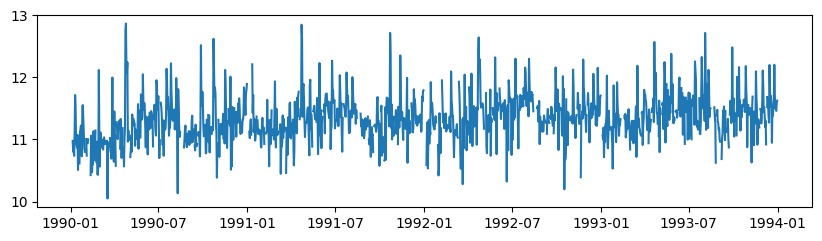

In [3]:
df = pd.read_excel('../data/apparel.xlsx')
df['ds'] = pd.to_datetime(df['ds'])

df['y'] = np.log(df['y'])

plt.figure(figsize=(10,2.5),dpi=100)
plt.plot(df['ds'], df['y'])

## 長期的なトレンド予測

17:17:21 - cmdstanpy - INFO - Chain [1] start processing
17:17:22 - cmdstanpy - INFO - Chain [1] done processing


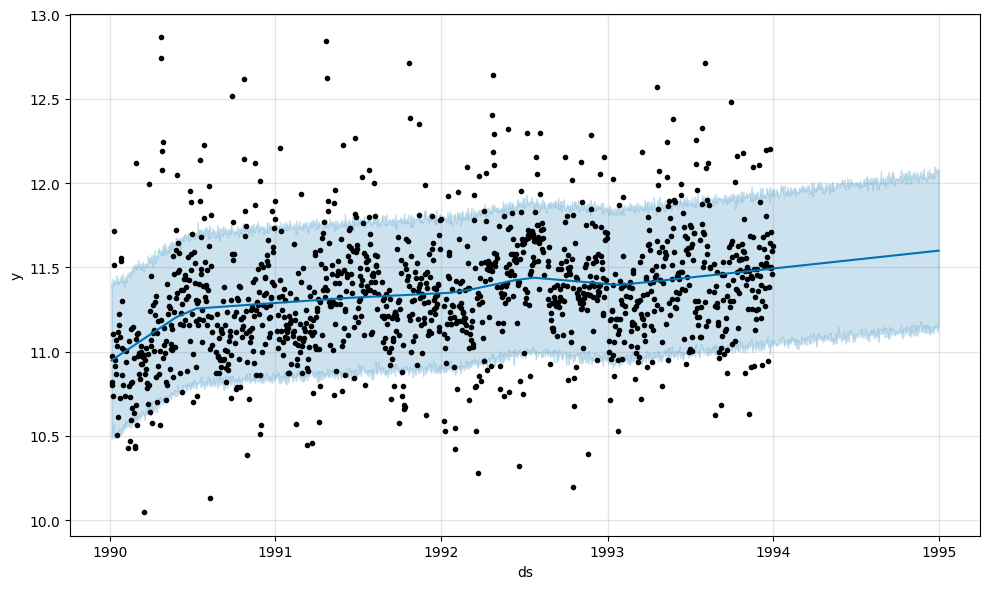

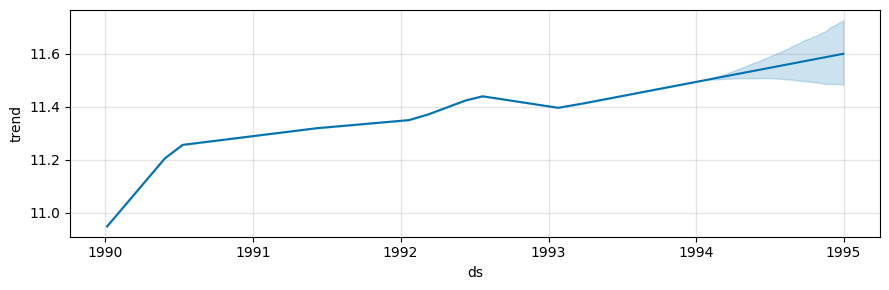

In [4]:
m = Prophet(weekly_seasonality = False, yearly_seasonality = False)
m.fit(df)

#予測する日付を生成
future = m.make_future_dataframe(periods=365)

#予測を実施
forecast = m.predict(future)

#実際のデータとトレンドを重ね合わせて表示
fig1 = m.plot(forecast)

#トレンドのみ表示
fig2 = m.plot_components(forecast)

## 月,週のトレンド予測

17:18:25 - cmdstanpy - INFO - Chain [1] start processing
17:18:25 - cmdstanpy - INFO - Chain [1] done processing


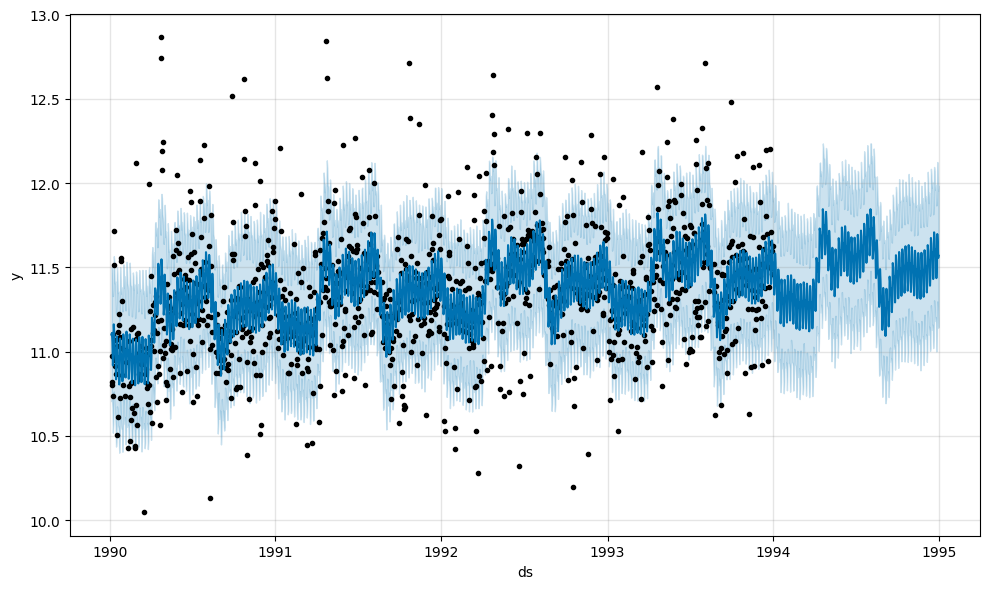

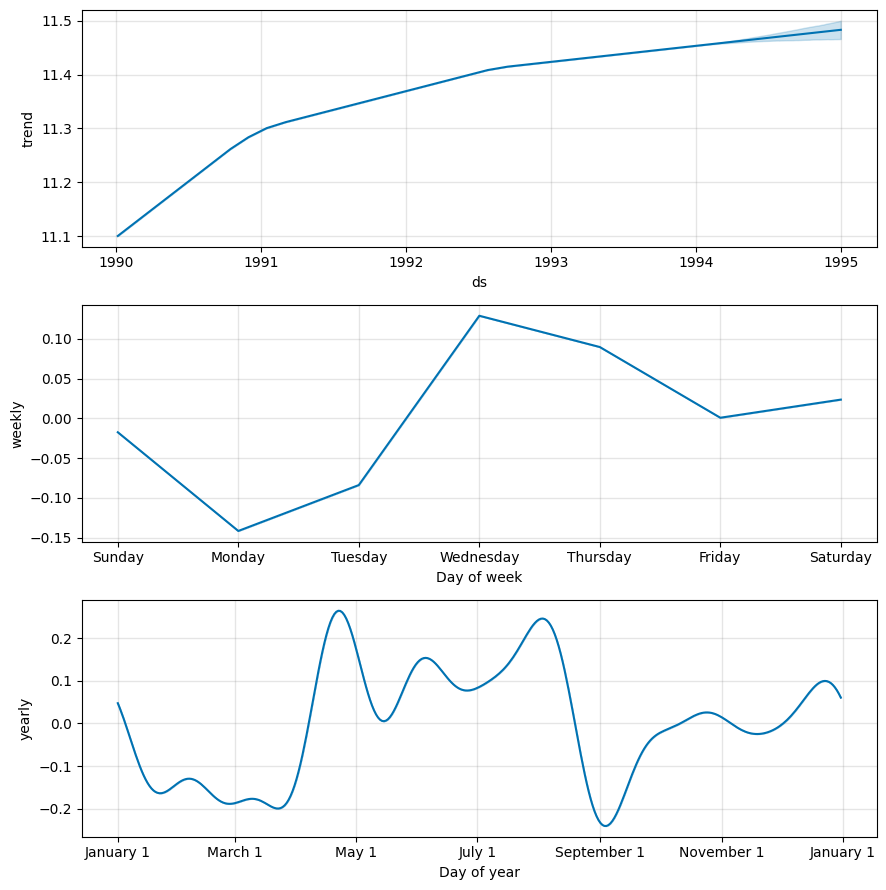

In [7]:
#モデルの生成
m = Prophet(weekly_seasonality = True, yearly_seasonality = True)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

## 休日情報の読み込み

In [8]:
with open('../data/holidays_1990_1993.txt', 'r', encoding='utf-8') as f:
    hl_list = [line.strip() for line in f if line.strip()]

holidays = pd.DataFrame({
  'holiday': 'holidays_1990_1993',
  'ds': pd.to_datetime(hl_list),
  'lower_window': 0,
  'upper_window': 1,
})

In [ ]:
m = Prophet(weekly_seasonality = True, yearly_seasonality = True, holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)